# Pyber Analysis

* Most drivers are located in urban cities where most rides are taken.
* Rural cities have less drivers and rides taken than suburban and urban cities, but also tend to have a higher average fare.  More information is needed to determine what is driving this; longer trips, scarcity of drivers, or something else. 
* Approx. 81% of total drivers are in urban cities but only 68% of total rides and 63% of total fares are in urban cities. This suggests that competition for rides is higher amongst urban drivers than suburban and rural drivers.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load
city_data_filepath = os.path.join('data','city_data.csv')
ride_data_filepath = os.path.join('data','ride_data.csv')

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_filepath)
ride_data_df = pd.read_csv(ride_data_filepath)

# Combine the data into a single dataset
city_ride_data = pd.merge(city_data_df, ride_data_df, how="inner", on="city")

# Display the DataFrame
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


### Create a DataFrame for rural rides

In [8]:
# Create a new DataFrame from city_ride_data that only includes rides in rural cities
rural_data = city_ride_data[city_ride_data['type'] =='Rural']

# Obtain the avg driver count, avg fare, and total rides for each rural city
rural_driver_count = rural_data.groupby('city').mean()['driver_count']
rural_avg_fare = rural_data.groupby('city').mean()['fare']
rural_rides_per_city = rural_data.groupby('city').count()['ride_id']

# Merge the groupby objects into a new DataFrame
rural_merge_driver_fare = pd.merge(rural_driver_count, rural_avg_fare,on='city')
rural_merge_driver_fare_rides = pd.merge(rural_merge_driver_fare,rural_rides_per_city, on='city' )

# Reneame the columns
rural_merge = rural_merge_driver_fare_rides.rename(columns={'fare': 'rural_avg_fare', 'ride_id': 'rural_ride_count', \
                                                            'driver_count': 'rural_driver_count'})

# rural_merge.head()

### Create a DataFrame for urban rides

In [10]:
# Create a new DataFrame from city_ride_data that only includes rides in urban cities
urban_data = city_ride_data[city_ride_data['type'] =='Urban']

# Obtain the avg driver count, avg fare, and total rides for each urban city
urban_driver_count = urban_data.groupby('city').mean()['driver_count']
urban_avg_fare = urban_data.groupby('city').mean()['fare']
urban_rides_per_city = urban_data.groupby('city').count()['ride_id']

# Merge the groupby objects into a new DataFrame
urban_merge_driver_fare = pd.merge(urban_driver_count, urban_avg_fare,on='city')
urban_merge_driver_fare_rides = pd.merge(urban_merge_driver_fare, urban_rides_per_city, on='city' )

# Rename the columns 
urban_merge = urban_merge_driver_fare_rides.rename(columns={'fare': 'urban_avg_fare', 'ride_id': 'urban_ride_count', \
                                                            'driver_count': 'urban_driver_count'})

# urban_merge.head()

### Create a DataFrame for suburban rides

In [11]:
# Create a new DataFrame from city_ride_data that only includes rides in suburban cities
suburban_data = city_ride_data[city_ride_data['type'] =='Suburban']

# Obtain the avg driver count, avg fare, and total rides for each suburban city
suburban_driver_count = suburban_data.groupby('city').mean()['driver_count']
suburban_avg_fare = suburban_data.groupby('city').mean()['fare']
suburban_rides_per_city = suburban_data.groupby('city').count()['ride_id']

# Merge the groupby objects into a new DataFrame
suburban_merge_driver_fare = pd.merge(suburban_driver_count, suburban_avg_fare,on='city')
suburban_merge_driver_fare_rides = pd.merge(suburban_merge_driver_fare, suburban_rides_per_city, on='city' )

# Rename the columns 
suburban_merge = suburban_merge_driver_fare_rides.rename(columns={'fare': 'sub_avg_fare', 'ride_id': 'sub_ride_count', \
                                                                  'driver_count': 'sub_driver_count'})

# suburban_merge.head()

## Bubble Plot of Ride Sharing Data

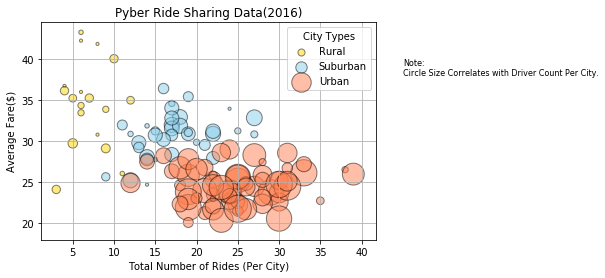

In [8]:
# Obtain the x and y coordinates for each of the three city types
    # rural_merge
    # suburban_merge
    # urban_merge


# Build the scatter plots for each city type

rural_plot = plt.scatter(rural_merge['rural_ride_count'], rural_merge['rural_avg_fare'],\
s=(rural_merge['rural_driver_count']*10), facecolor='gold', edgecolor='black', alpha=.50)


suburban_plot = plt.scatter(suburban_merge['sub_ride_count'], suburban_merge['sub_avg_fare'], \
s=(suburban_merge['sub_driver_count']*10), facecolor='skyblue', edgecolor='black', alpha=.50)


urban_plot = plt.scatter(urban_merge['urban_ride_count'], urban_merge['urban_avg_fare'], \
s=(urban_merge['urban_driver_count']*10), facecolor='coral', edgecolor='black', alpha=.50)


# Label the x and y axis, include a title, and add gridlines to the scatter plot
plt.grid(True)
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')

# Create a legend
plt.legend(['Rural', 'Suburban', 'Urban'], loc='best', title='City Types')

# Incorporate a text label regarding circle size
textstr = f"Note:\nCircle Size Correlates with Driver Count Per City."
plt.text(45, 38, textstr, fontsize=8)

# Save the bubble plot
plt.savefig('Pyber Ride Sharing Data(2016)')

##  Pie Chart of Total Fares by City Type

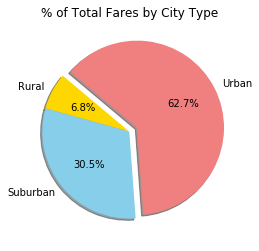

In [26]:
# Calculate Type Percents
total_fare = city_ride_data.sum()['fare']
# total_fare

rural_fares = rural_data.sum()['fare']
rural_fare_pct = rural_fares/total_fare
# rural_fare_pct

suburban_fares = suburban_data.sum()['fare']
suburban_fare_pct = suburban_fares/total_fare
suburban_fare_pct

urban_fares = urban_data.sum()['fare']
urban_fare_pct = urban_fares/total_fare
urban_fare_pct

labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = [rural_fare_pct, suburban_fare_pct, urban_fare_pct]


# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = [rural_fare_pct, suburban_fare_pct, urban_fare_pct]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Pyber Total Fares by City Type.png')


## Total Rides by City Type

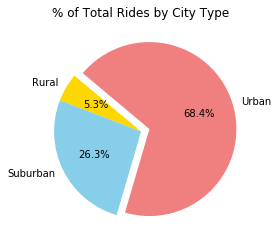

In [27]:
# Calculate Ride Percents
total_rides = city_ride_data.count()['ride_id']

rural_rides = rural_data.count()['ride_id']
rural_ride_pct = rural_rides/total_rides

suburban_rides = suburban_data.count()['ride_id']
suburban_ride_pct = suburban_rides/total_rides

urban_rides = urban_data.count()['ride_id']
urban_ride_pct = urban_rides/total_rides

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = [rural_ride_pct, suburban_ride_pct, urban_ride_pct]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Pyber Total Rides by City Type.png')

## Total Drivers by City Type

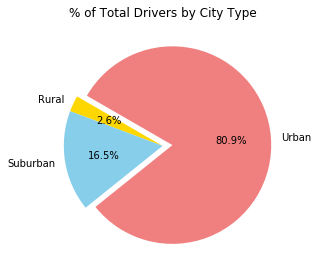

In [25]:
# Calculate Driver Percents
total_drivers = rural_driver_count.sum() + suburban_driver_count.sum() + urban_driver_count.sum()

rural_drivers = rural_driver_count.sum()
rural_drivers_pct = rural_drivers/total_drivers

suburban_drivers = suburban_driver_count.sum()
suburban_drivers_pct = suburban_drivers/total_drivers

urban_drivers = urban_driver_count.sum()
urban_drivers_pct = urban_drivers/total_drivers

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold", "skyblue", "lightcoral"]
explode = (0, 0, 0.1)
sizes = [rural_drivers_pct, suburban_drivers_pct, urban_drivers_pct]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=150)
plt.title('% of Total Drivers by City Type')
plt.tight_layout()
# Save Figure
plt.savefig('Pyber Total Drivers by City Type.png')